In [83]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-16.0.1"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/graph

In [84]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
filename = '/content/공모전_제공_데이터(1차).xlsx'
data = pd.read_excel(filename)
data.tail()

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종분류(우선순위 가장 높은것 선택)
995,9958,103,카드분실된지 1분만에 카드를 통해서 연락받아 바로 찾았어요 잃어버린지도 몰랐는데 감...,칭찬>삼성카드>카드상품,11,NaN,NaN,NaN,NaN,칭찬>삼성카드>카드상품
996,9961,2,수시로 6개월무이자할부와 링크혜택이 다른카드와 구별되는 기능이 편리함,칭찬>삼성카드>혜택,7,칭찬>삼성카드>혜택,7.0,NaN,NaN,칭찬>삼성카드>혜택
997,9962,4,무이자할부 자주 많이 주셔서감사합니다,칭찬>삼성카드>혜택,7,NaN,NaN,NaN,NaN,칭찬>삼성카드>혜택
998,9963,5,무이자혜택만족긴할부만족잘쓰고있습니다,칭찬>삼성카드>혜택,7,NaN,NaN,NaN,NaN,칭찬>삼성카드>혜택
999,9964,7,무이자 혜택이 많아 잘쓰고있어요.,칭찬>삼성카드>혜택,7,NaN,NaN,NaN,NaN,칭찬>삼성카드>혜택


In [30]:
data.describe()

,NO,NO2,발화1의 우선순위,발화2의 우선순위,발화3의 우선순위
count,1000.000000,1000.000000,1000.000000,32.000000,3.000000
mean,4267.762000,11466.211000,13.063000,9.531250,10.666667
std,2777.137422,11207.875878,13.370108,11.167304,11.547005
min,1.000000,1.000000,1.000000,1.000000,4.000000
25%,1375.750000,354.750000,1.000000,4.000000,4.000000
50%,4924.500000,11948.500000,5.000000,4.000000,4.000000
75%,5750.250000,22662.000000,24.000000,5.500000,14.000000
max,9964.000000,60782.000000,43.000000,42.000000,24.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NO                    1000 non-null   int64  
 1   NO2                   1000 non-null   int64  
 2   발화                    1000 non-null   object 
 3   발화1                   1000 non-null   object 
 4   발화1의 우선순위             1000 non-null   int64  
 5   발화2                   32 non-null     object 
 6   발화2의 우선순위             32 non-null     float64
 7   발화3                   3 non-null      object 
 8   발화3의 우선순위             3 non-null      float64
 9   최종분류(우선순위 가장 높은것 선택)  1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [32]:
data.isnull().sum()

NO                        0
NO2                       0
발화                        0
발화1                       0
발화1의 우선순위                 0
발화2                     968
발화2의 우선순위               968
발화3                     997
발화3의 우선순위               997
최종분류(우선순위 가장 높은것 선택)      0
dtype: int64

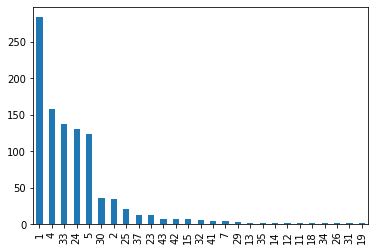

In [33]:
data['발화1의 우선순위'].value_counts().plot(kind = 'bar')

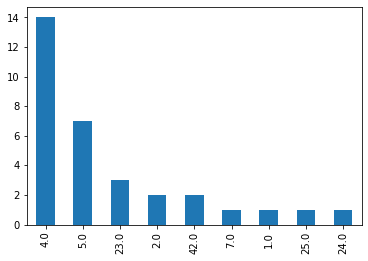

In [34]:
data['발화2의 우선순위'].value_counts().plot(kind = 'bar')

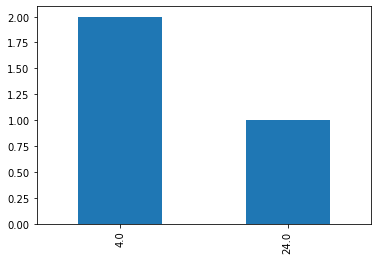

In [35]:
data['발화3의 우선순위'].value_counts().plot(kind = 'bar')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NO                    1000 non-null   int64  
 1   NO2                   1000 non-null   int64  
 2   발화                    1000 non-null   object 
 3   발화1                   1000 non-null   object 
 4   발화1의 우선순위             1000 non-null   int64  
 5   발화2                   32 non-null     object 
 6   발화2의 우선순위             32 non-null     float64
 7   발화3                   3 non-null      object 
 8   발화3의 우선순위             3 non-null      float64
 9   최종분류(우선순위 가장 높은것 선택)  1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [145]:
data['발화2의 우선순위'] = data['발화2의 우선순위'].fillna(0.0).astype(int)

In [146]:
data['발화3의 우선순위'] = data['발화3의 우선순위'].fillna(0.0).astype(int)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NO                    1000 non-null   int64 
 1   NO2                   1000 non-null   int64 
 2   발화                    1000 non-null   object
 3   발화1                   1000 non-null   object
 4   발화1의 우선순위             1000 non-null   int64 
 5   발화2                   32 non-null     object
 6   발화2의 우선순위             1000 non-null   int64 
 7   발화3                   3 non-null      object
 8   발화3의 우선순위             1000 non-null   int64 
 9   최종분류(우선순위 가장 높은것 선택)  1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [147]:
data['발화2'] = data['발화2'].fillna('')

In [148]:
data['발화3'] = data['발화3'].fillna('')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NO                    1000 non-null   int64 
 1   NO2                   1000 non-null   int64 
 2   발화                    1000 non-null   object
 3   발화1                   1000 non-null   object
 4   발화1의 우선순위             1000 non-null   int64 
 5   발화2                   1000 non-null   object
 6   발화2의 우선순위             1000 non-null   int64 
 7   발화3                   1000 non-null   object
 8   발화3의 우선순위             1000 non-null   int64 
 9   최종분류(우선순위 가장 높은것 선택)  1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [126]:
data.isnull().sum()

NO                      0
NO2                     0
발화                      0
발화1                     0
발화1의 우선순위               0
발화2                     0
발화2의 우선순위               0
발화3                     0
발화3의 우선순위               0
최종분류(우선순위 가장 높은것 선택)    0
dtype: int64

In [149]:
data['발화_변경'] = data['발화'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거

In [1]:
data.head()

NameError: ignored

In [129]:
display(data[data.duplicated(['발화_변경'])])

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종분류(우선순위 가장 높은것 선택),발화_변경
78,79,24947,통화대기시간이너무길어요~,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,통화대기시간이너무길어요
476,4563,59,연회비 넘비싸다~,불만>삼성카드>청구입금,30,,0,,0,불만>삼성카드>청구입금,연회비 넘비싸다
489,4576,73,연회비가너무비싸요,불만>삼성카드>청구입금,30,,0,,0,불만>삼성카드>청구입금,연회비가너무비싸요
575,5576,257,친절한 상담에 감사드립니다.,칭찬>고객서비스>상담원,1,,0,,0,칭찬>고객서비스>상담원,친절한 상담에 감사드립니다
577,5578,259,친절하게 상담해주셔서 감사드립니다,칭찬>고객서비스>상담원,1,,0,,0,칭찬>고객서비스>상담원,친절하게 상담해주셔서 감사드립니다
...,...,...,...,...,...,...,...,...,...,...,...
837,5838,520,친절하고 감사했습니다.,칭찬>고객서비스>상담원,1,,0,,0,칭찬>고객서비스>상담원,친절하고 감사했습니다
840,5841,523,친절하세요~ 감사합니다,칭찬>고객서비스>상담원,1,,0,,0,칭찬>고객서비스>상담원,친절하세요 감사합니다
849,8460,3133,상담 감사합니다.,칭찬>기타,24,,0,,0,칭찬>기타,상담 감사합니다
855,8466,3150,상담 감사합니다,칭찬>기타,24,,0,,0,칭찬>기타,상담 감사합니다


In [151]:
stopword = pd.read_csv('stopwords.txt')

In [152]:
stopword.tail()

,불용어
670,일곱
671,여덟
672,아홉
673,령
674,영


In [153]:
stopwords = list(np.array(stopword['불용어'].tolist()))

In [133]:
data.head()

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종분류(우선순위 가장 높은것 선택),발화_변경
0,1,6438,상담직원과 빠른연결했슴좋겠어요,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,상담직원과 빠른연결했슴좋겠어요
1,2,6850,안기다리고. 빨리상담되었음좋겠다,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,안기다리고 빨리상담되었음좋겠다
2,3,7294,너무 오래기다리고 상담이 늦어져요,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,너무 오래기다리고 상담이 늦어져요
3,4,9484,상담직원과 통화가 매우 힘들다,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,상담직원과 통화가 매우 힘들다
4,5,10350,상담받으려면오래기다리는게불편함,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,상담받으려면오래기다리는게불편함


In [154]:
data.rename(columns = {"최종분류(우선순위 가장 높은것 선택)": "최종_분류"}, inplace = True)

In [161]:
data.tail()

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종_분류,발화_변경
995,9958,103,카드분실된지 1분만에 카드를 통해서 연락받아 바로 찾았어요 잃어버린지도 몰랐는데 감...,칭찬>삼성카드>카드상품,11,,0,,0,칭찬>삼성카드>카드상품,카드분실된지 분만에 카드를 통해서 연락받아 바로 찾았어요 잃어버린지도 몰랐는데 감사합니다
996,9961,2,수시로 6개월무이자할부와 링크혜택이 다른카드와 구별되는 기능이 편리함,칭찬>삼성카드>혜택,7,칭찬>삼성카드>혜택,7,,0,칭찬>삼성카드>혜택,수시로 개월무이자할부와 링크혜택이 다른카드와 구별되는 기능이 편리함
997,9962,4,무이자할부 자주 많이 주셔서감사합니다,칭찬>삼성카드>혜택,7,,0,,0,칭찬>삼성카드>혜택,무이자할부 자주 많이 주셔서감사합니다
998,9963,5,무이자혜택만족긴할부만족잘쓰고있습니다,칭찬>삼성카드>혜택,7,,0,,0,칭찬>삼성카드>혜택,무이자혜택만족긴할부만족잘쓰고있습니다
999,9964,7,무이자 혜택이 많아 잘쓰고있어요.,칭찬>삼성카드>혜택,7,,0,,0,칭찬>삼성카드>혜택,무이자 혜택이 많아 잘쓰고있어요


In [158]:
data_2 = data.최종_분류.str.split('>', expand=True)
data_2

,0,1,2
0,불만,고객서비스,상담시스템
1,불만,고객서비스,상담시스템
2,불만,고객서비스,상담시스템
3,불만,고객서비스,상담시스템
4,불만,고객서비스,상담시스템
...,...,...,...
995,칭찬,삼성카드,카드상품
996,칭찬,삼성카드,혜택
997,칭찬,삼성카드,혜택
998,칭찬,삼성카드,혜택


In [160]:
data_2.columns = ['pos/neg', '2', '3']
data_2.tail()

,pos/neg,2,3
995,칭찬,삼성카드,카드상품
996,칭찬,삼성카드,혜택
997,칭찬,삼성카드,혜택
998,칭찬,삼성카드,혜택
999,칭찬,삼성카드,혜택


In [165]:
data = data.join(data_2)
data.head()

ValueError: ignored

In [167]:
data.head()

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종_분류,발화_변경,pos/neg,2,3
0,1,6438,상담직원과 빠른연결했슴좋겠어요,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,상담직원과 빠른연결했슴좋겠어요,불만,고객서비스,상담시스템
1,2,6850,안기다리고. 빨리상담되었음좋겠다,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,안기다리고 빨리상담되었음좋겠다,불만,고객서비스,상담시스템
2,3,7294,너무 오래기다리고 상담이 늦어져요,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,너무 오래기다리고 상담이 늦어져요,불만,고객서비스,상담시스템
3,4,9484,상담직원과 통화가 매우 힘들다,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,상담직원과 통화가 매우 힘들다,불만,고객서비스,상담시스템
4,5,10350,상담받으려면오래기다리는게불편함,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,상담받으려면오래기다리는게불편함,불만,고객서비스,상담시스템


In [183]:
n_pos = data['pos/neg'] != '칭찬'
n_neg = data['pos/neg'] != '불만'
data[n_pos & n_neg]

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종_분류,발화_변경,pos/neg,2,3
516,5139,121,보이는화면,중립,43,,0,,0,중립,보이는화면,중립,None,None
517,5140,122,화면으로보는 디지털 ARS,중립,43,,0,,0,중립,화면으로보는 디지털,중립,None,None
518,5141,124,화면 상담 서비스,중립,43,,0,,0,중립,화면 상담 서비스,중립,None,None
519,5142,126,터치식 화면,중립,43,,0,,0,중립,터치식 화면,중립,None,None
520,5143,134,화면을 구현하는 ars,중립,43,,0,,0,중립,화면을 구현하는,중립,None,None
521,5144,144,화면연결,중립,43,,0,,0,중립,화면연결,중립,None,None
522,5145,163,바로 보는 화면 서비스,중립,43,,0,,0,중립,바로 보는 화면 서비스,중립,None,None


In [195]:
points = [] #리스트 생성 
for i in data['pos/neg'] : #'average' 값을 얻어옴 
    if i == '칭찬': 
        points.append(1) #평균이 90점 이상이면 grades에 A를 추가 
    elif i == '불만': 
        points.append(-1)
    else:
        points.append(0) 
data['points'] = points #grade열에 순차대로 원소를 대입

data = data.drop(columns=['point'], axis=1)
data.head()

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종_분류,발화_변경,pos/neg,2,3,points
0,1,6438,상담직원과 빠른연결했슴좋겠어요,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,상담직원과 빠른연결했슴좋겠어요,불만,고객서비스,상담시스템,-1
1,2,6850,안기다리고. 빨리상담되었음좋겠다,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,안기다리고 빨리상담되었음좋겠다,불만,고객서비스,상담시스템,-1
2,3,7294,너무 오래기다리고 상담이 늦어져요,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,너무 오래기다리고 상담이 늦어져요,불만,고객서비스,상담시스템,-1
3,4,9484,상담직원과 통화가 매우 힘들다,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,상담직원과 통화가 매우 힘들다,불만,고객서비스,상담시스템,-1
4,5,10350,상담받으려면오래기다리는게불편함,불만>고객서비스>상담시스템,5,,0,,0,불만>고객서비스>상담시스템,상담받으려면오래기다리는게불편함,불만,고객서비스,상담시스템,-1


In [199]:
data['2'].value_counts()

고객서비스    610
삼성카드     253
기타       130
Name: 2, dtype: int64

In [200]:
data['3'].value_counts()

상담원        450
상담시스템      160
상담/채널      141
청구입금        36
혜택          26
고객정보관리      14
생활편의서비스      6
카드상품         3
심사/한도        3
라이프서비스       2
할부금융상품       1
리스렌탈상품       1
금융상품         1
Name: 3, dtype: int64

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종_분류,발화_변경,pos/neg,2,3,points
312,3121,27775,카드 취소되면 베네포유 복지포인트 자동으로 복구시켜 주세요,불만>삼성카드>라이프서비스,35,,0,,0,불만>삼성카드>라이프서비스,카드 취소되면 베네포유 복지포인트 자동으로 복구시켜 주세요,불만,삼성카드,라이프서비스,-1
313,3122,37326,복지포인트사용이 너무 어려워요,불만>삼성카드>라이프서비스,35,,0,,0,불만>삼성카드>라이프서비스,복지포인트사용이 너무 어려워요,불만,삼성카드,라이프서비스,-1


In [205]:
data.tail()

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종_분류,발화_변경,pos/neg,2,3,points
995,9958,103,카드분실된지 1분만에 카드를 통해서 연락받아 바로 찾았어요 잃어버린지도 몰랐는데 감...,칭찬>삼성카드>카드상품,11,,0,,0,칭찬>삼성카드>카드상품,카드분실된지 분만에 카드를 통해서 연락받아 바로 찾았어요 잃어버린지도 몰랐는데 감사합니다,칭찬,삼성카드,카드상품,1
996,9961,2,수시로 6개월무이자할부와 링크혜택이 다른카드와 구별되는 기능이 편리함,칭찬>삼성카드>혜택,7,칭찬>삼성카드>혜택,7,,0,칭찬>삼성카드>혜택,수시로 개월무이자할부와 링크혜택이 다른카드와 구별되는 기능이 편리함,칭찬,삼성카드,혜택,1
997,9962,4,무이자할부 자주 많이 주셔서감사합니다,칭찬>삼성카드>혜택,7,,0,,0,칭찬>삼성카드>혜택,무이자할부 자주 많이 주셔서감사합니다,칭찬,삼성카드,혜택,1
998,9963,5,무이자혜택만족긴할부만족잘쓰고있습니다,칭찬>삼성카드>혜택,7,,0,,0,칭찬>삼성카드>혜택,무이자혜택만족긴할부만족잘쓰고있습니다,칭찬,삼성카드,혜택,1
999,9964,7,무이자 혜택이 많아 잘쓰고있어요.,칭찬>삼성카드>혜택,7,,0,,0,칭찬>삼성카드>혜택,무이자 혜택이 많아 잘쓰고있어요,칭찬,삼성카드,혜택,1


In [ ]:
상담하는데 2박3일 정도 걸리나요? 하핳 역시 대기업답고 좋네요^^
응대 속도 역시 무지막지하게 빠르게 좋아요 아주 아주 만족스럽네요 다시는 안할듯

In [207]:
from sklearn.model_selection import train_test_split

# shuffle = True
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True, random_state=18)

In [208]:
okt = Okt()
X_train = []
for sentence in train_data['발화_변경']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [209]:
print(X_train[:3])

[['상담', '친절하다', '감사하다'], ['글쎄요', '도', '많이', '친절하다'], ['친절하다', '감사하다']]


In [210]:
X_test = []
for sentence in test_data['발화_변경']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [211]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [212]:
print(tokenizer.word_index)

{'상담': 1, '친절하다': 2, '하다': 3, '감사하다': 4, '너무': 5, '좋다': 6, '연결': 7, '해주다': 8, '원': 9, '화면': 10, '통화': 11, '카드': 12, '직원': 13, '감사': 14, '친절': 15, '되다': 16, '은': 17, '고객': 18, '도': 19, '드리다': 20, '상담사': 21, '전화': 22, '없다': 23, '불편하다': 24, '는': 25, '대기': 26, '받다': 27, '연': 28, '터치': 29, '설명': 30, '회비': 31, '응대': 32, '되어다': 33, '않다': 34, '처리': 35, '보이다': 36, '안내': 37, '빠르다': 38, '서비스': 39, '정확하다': 40, '삼성': 41, '답변': 42, '많이': 43, '더': 44, '다': 45, '성': 46, '분': 47, '기분': 48, '요': 49, '많다': 50, '내용': 51, '길다': 52, '시': 53, '잘': 54, '모르다': 55, '적': 56, '이자': 57, '기다': 58, '회사': 59, '무': 60, '아니다': 61, '할부': 62, '주다': 63, '한': 64, '타': 65, '질문': 66, '보다': 67, '이다': 68, '알다': 69, '힘들다': 70, '매우': 71, '음성': 72, '말투': 73, '하고': 74, '면': 75, '생각': 76, '대': 77, '비싸다': 78, '과의': 79, '기': 80, '함': 81, '자다': 82, '원하다': 83, '어렵다': 84, '안되다': 85, '기다리다': 86, '문자': 87, '번': 88, '수': 89, '만': 90, '혜택': 91, '문의': 92, '넘다': 93, '오늘': 94, '에도': 95, '부분': 96, '신속하다': 97, '내': 98, '사용': 99, '짧다': 100, '안': 

In [213]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수 카운트
total_freq = 0 # 훈련데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수 총 합

# 단어와 빈도수의 쌍을 key와 value로 받는다
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if value < threshold:
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 : ', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 :  1106
등장 빈도가 2번 이하인 희귀 단어의 수: 753
단어 집합에서 희귀 단어의 비율: 68.08318264014467
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 14.768564768564769


In [214]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 354


In [215]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [216]:
print(X_train[:3])

[[1, 2, 4], [19, 43, 2], [2, 4]]


In [217]:
y_train = np.array(train_data['points'])
y_test = np.array(test_data['points'])

In [218]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [219]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

800
800


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


리뷰의 최대 길이 : 46
리뷰의 평균 길이 : 6.39875


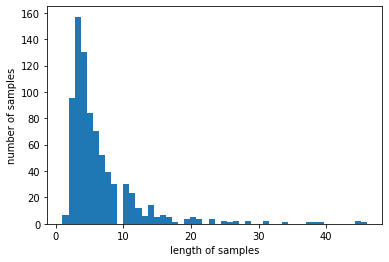

In [220]:
print('발화의 최대 길이 :',max(len(l) for l in X_train))
print('발화의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [221]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [224]:
max_len = 40 
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 100.0


In [225]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [226]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [227]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [228]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [229]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
11/11 [==============================] - 6s 246ms/step - loss: -0.4594 - acc: 0.0516 - val_loss: 1.1642 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_model.h5
Epoch 2/15
11/11 [==============================] - 2s 214ms/step - loss: -1.0449 - acc: 0.0094 - val_loss: 1.4307 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/15
11/11 [==============================] - 2s 204ms/step - loss: -1.3676 - acc: 0.0094 - val_loss: 0.9782 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/15
11/11 [==============================] - 3s 235ms/step - loss: -1.8698 - acc: 0.0094 - val_loss: -0.7119 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/15
11/11 [==============================] - 2s 214ms/step - loss: -3.8010 - acc: 0.0094 - val_loss: -2.5346 - val_acc: 0.0000e+00

Epoch 00005: val_acc did not improve from 0.00000
Epoch 6/15
11/11 [========

In [230]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

7/7 [==============================] - 1s 17ms/step - loss: -12.6086 - acc: 0.3850

 테스트 정확도: 0.3850


In [231]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))